This notebook here will be to try to get a good idea of whether I should use the MODIS or VIIRS data. I originally started out with a download of the [MODIS data](http://firemapper.sc.egov.usda.gov/gisdata.php) because it offered more data (it goes back to 2001, where VIIRS goes back to 2012). However, the VIIRS data is at a higher resolution, and in that sense it's at least worth taking a look at. 

I'm going to start off by looking at some basic statistics from each of the data sets for a given year - # of obs., # of fires, variable distribution. Then, I'll do some geographical plotting to compare how the distribution of fire/non-fire observations differs across the two data sets. A number of these functions are pulled from the `map_exploration.ipynb` notebook also stored in this folder. Normally, I would throw these into a folder in the name of DRY, but right now I'm doing EDA and I'm not too worried about it. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dsfuncs.dist_plotting import plot_var_dist, plot_binary_response
from dsfuncs.geo_plotting import USMapBuilder
%matplotlib inline

In [2]:
def read_df(year, modis=True): 
    """This function will read in a year of data, and add a month column. 
    
    Args: 
        year: str
        modis: bool
            Whether to use the modis or viirs data for plotting. 
        
    Return:
        Pandas DataFrame
    """
    if modis: 
        output_df = pd.read_csv('../../../data/csvs/detected_fires_MODIS_' + str(year) + '.csv', 
                                parse_dates=['date'], true_values=['t'], false_values=['f'])
    else: 
         output_df = pd.read_csv('../../../data/csvs/detected_fires_VIIRS_' + str(year) + '.csv', 
                                parse_dates=['date'], true_values=['t'], false_values=['f'])
    output_df['month'] = output_df.date.apply(lambda dt: dt.strftime('%B'))
    output_df.dropna(subset=['region_name'], inplace=True) # These will be obs. in Canada. 
    return output_df

def calc_minor_stats(df): 
    """Calculate some minor, fixed stats for the inputted DataFrame. 
    
    Return the number of observations, the number of fires, and the 
    percentage of obs. that are a fire from the inputted DataFrame. 
    
    Args: 
        df: Pandas DataFrame
            Inputted DataFrame to grab some minor stats from. 
    
    Return: int (n_obs), int(n_fires), float (pct_fires)
    """
    
    n_obs = df.shape[0]
    n_fires = df.query('fire_bool == True').shape[0]
    pct_fires = float(n_fires) / n_obs
    
    return n_obs, n_fires, pct_fires

def return_fires(df): 
    """Segment out fires versus non-fires observations and return them. 
    
    Args: 
        df: Pandas DataFrame
        
    Return: Pandas DataFrame, Pandas DataFrame 
    """
    
    non_fires = df.query('fire_bool == 0')
    fires = df.query('fire_bool == 1')
    
    return fires, non_fires

def plot_modis_viirs(year): 
    """Plot the distributions of variables for modis and viirs. 
    
    Args: 
        year: int
    """
    
    continous_vars = ('lat', 'long', 'gmt', 'conf', 'county_aland', 'county_awater')
    categorical_vars = ('urban_areas_bool', 'src', 'sat_src')
    modis_df = read_df(year)
    viirs_df = read_df(year, modis=False)
    print 'Year: {}'.format(year)
    print '-' * 50
    n_modis_obs, n_modis_fires, pct_modis_fires = calc_minor_stats(modis_df)
    modis_fires, modis_non_fires = return_fires(modis_df)
    print 'Modis - Num. obs: {}, Num. fires: {}, Pct. fires: {}'.format(n_modis_obs, n_modis_fires, pct_modis_fires)
    n_viirs_obs, n_viirs_fires, pct_viirs_fires = calc_minor_stats(viirs_df)
    viirs_fires, viirs_non_fires = return_fires(viirs_df)
    print 'Viirs - Num. obs: {}, Num. fires: {}, Pct. fires: {}'.format(n_viirs_obs, n_viirs_fires, pct_viirs_fires)
    for var in continous_vars: 
        print 'Variable: {} : Fires, then non-fires... Modis, then VIIRS'.format(var)
        f, axes = plt.subplots(1, 8, figsize=(20, 5))
        plot_var_dist(modis_fires[var], categorical=False, ax=axes[0:2], show=False, outliers=False)
        plot_var_dist(modis_non_fires[var], categorical=False, ax=axes[2:4], show=False, outliers=False)
        plot_var_dist(viirs_fires[var], categorical=False, ax=axes[4:6], show=False, outliers=False)
        plot_var_dist(viirs_non_fires[var], categorical=False, ax=axes[6:8], show=False, outliers=False)
        plt.show()  
    for var in categorical_vars: 
        print 'Variable: {} : Fires, then non-fires... Modis, then VIIRS'.format(var)
        f, axes = plt.subplots(1, 4, figsize=(20, 5))
        plot_var_dist(modis_fires[var], categorical=True, ax=axes[0], show=False, outliers=False)
        plot_var_dist(modis_non_fires[var], categorical=True, ax=axes[1], show=False, outliers=False)
        plot_var_dist(viirs_fires[var], categorical=True, ax=axes[2], show=False, outliers=False)
        plot_var_dist(viirs_non_fires[var], categorical=True, ax=axes[3], show=False, outliers=False)
        plt.show()  

Year: 2012
--------------------------------------------------
Modis - Num. obs: 247286, Num. fires: 59731, Pct. fires: 0.241546225828
Viirs - Num. obs: 27383, Num. fires: 3433, Pct. fires: 0.125369754957
Variable: lat : Fires, then non-fires... Modis, then VIIRS


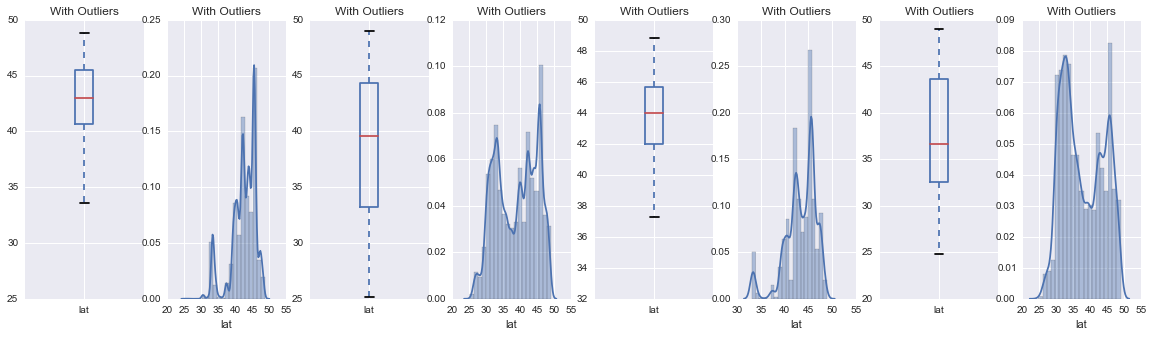

Variable: long : Fires, then non-fires... Modis, then VIIRS


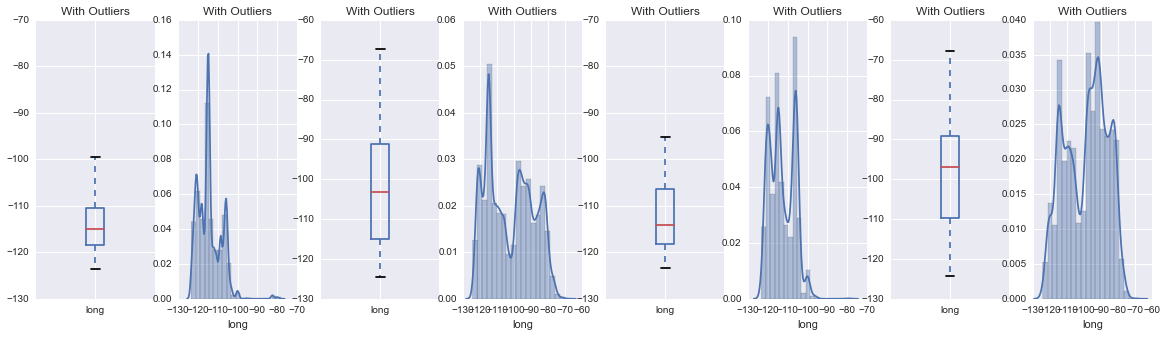

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


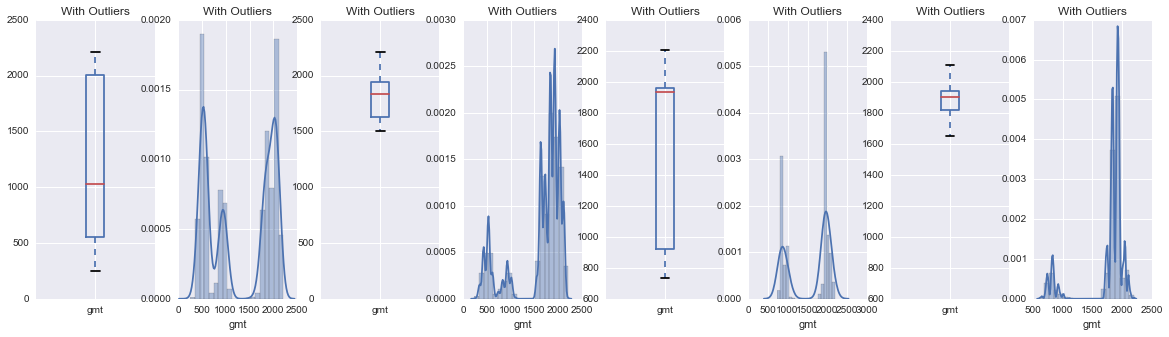

Variable: conf : Fires, then non-fires... Modis, then VIIRS


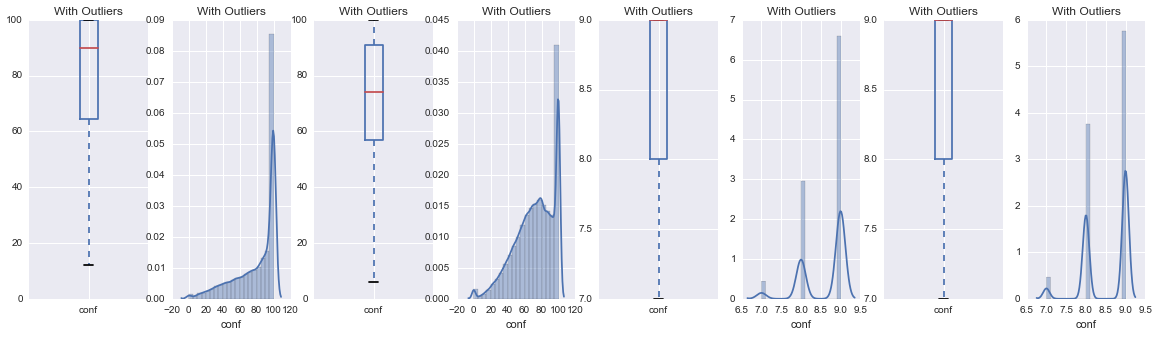

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


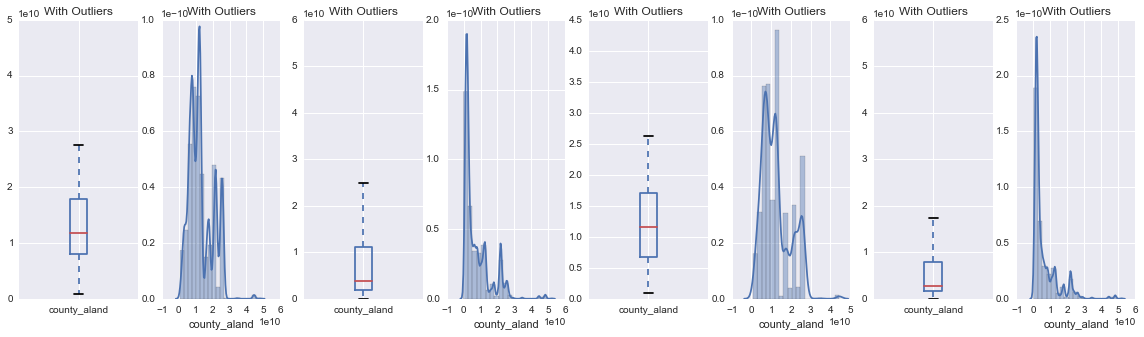

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


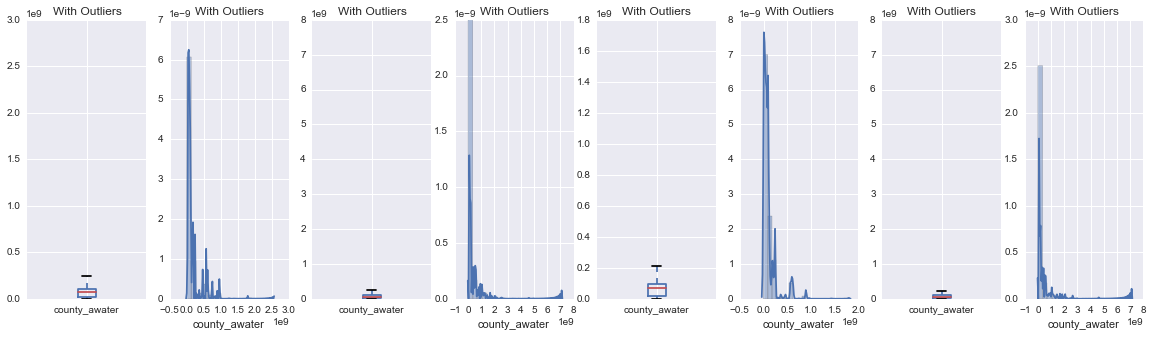

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


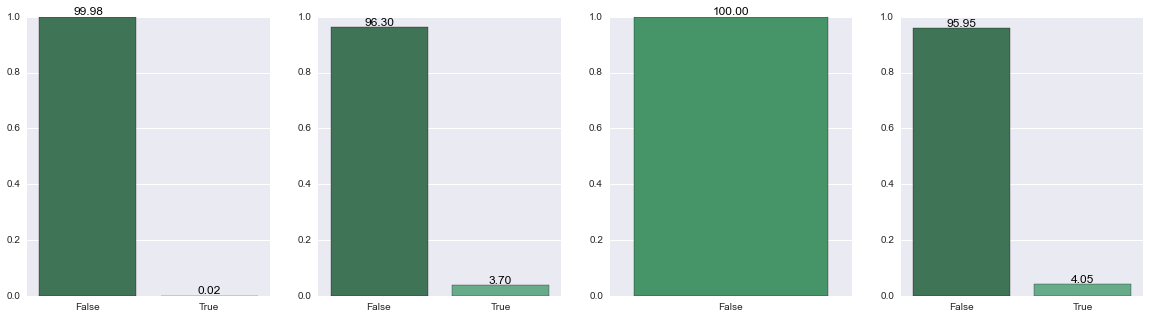

Variable: src : Fires, then non-fires... Modis, then VIIRS


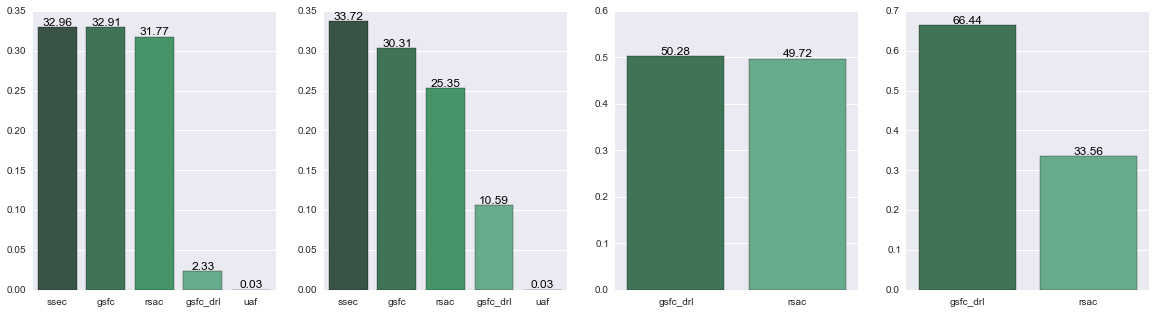

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


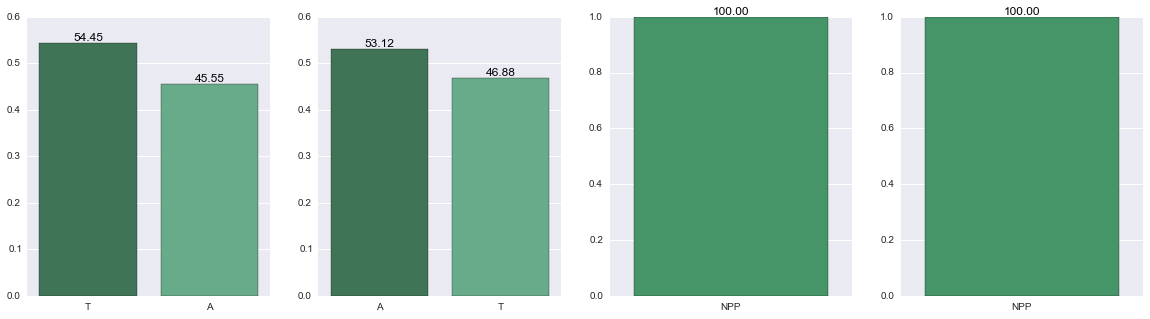

In [3]:
plot_modis_viirs(2012)

Year: 2013
--------------------------------------------------
Modis - Num. obs: 179295, Num. fires: 26997, Pct. fires: 0.150573077888
Viirs - Num. obs: 40770, Num. fires: 4968, Pct. fires: 0.121854304636
Variable: lat : Fires, then non-fires... Modis, then VIIRS


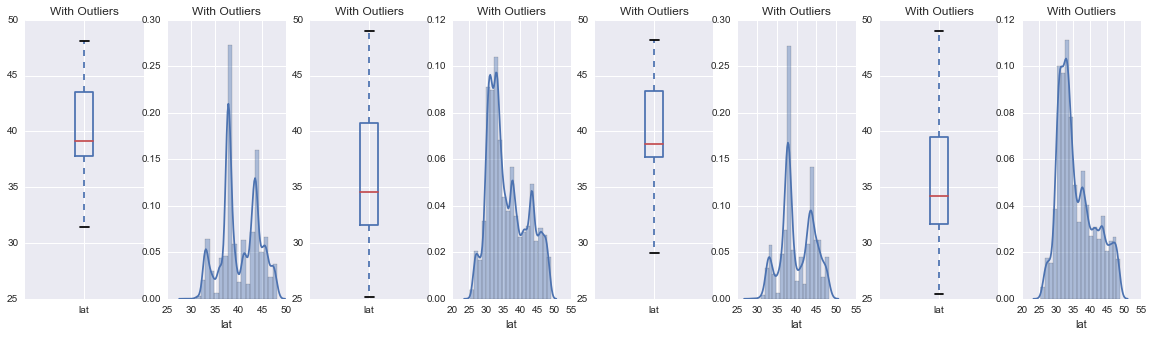

Variable: long : Fires, then non-fires... Modis, then VIIRS


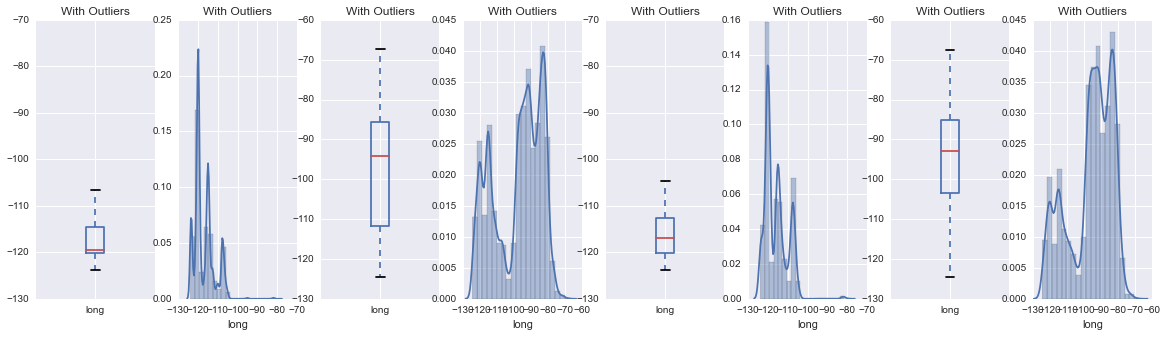

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


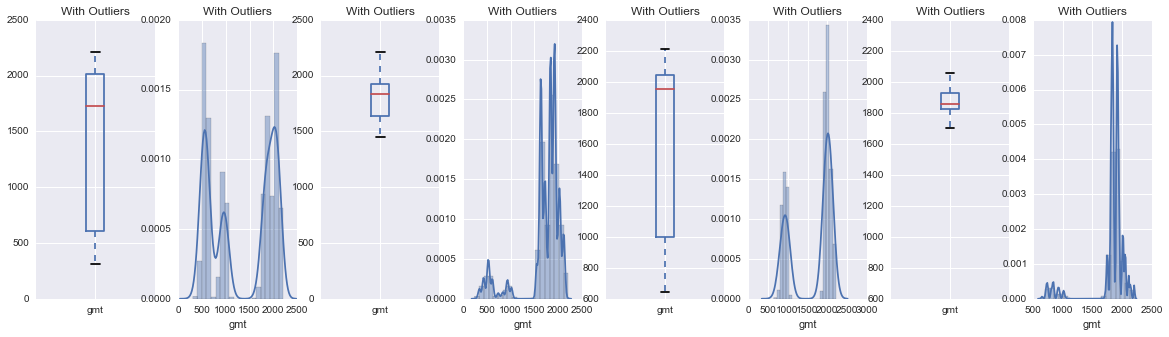

Variable: conf : Fires, then non-fires... Modis, then VIIRS


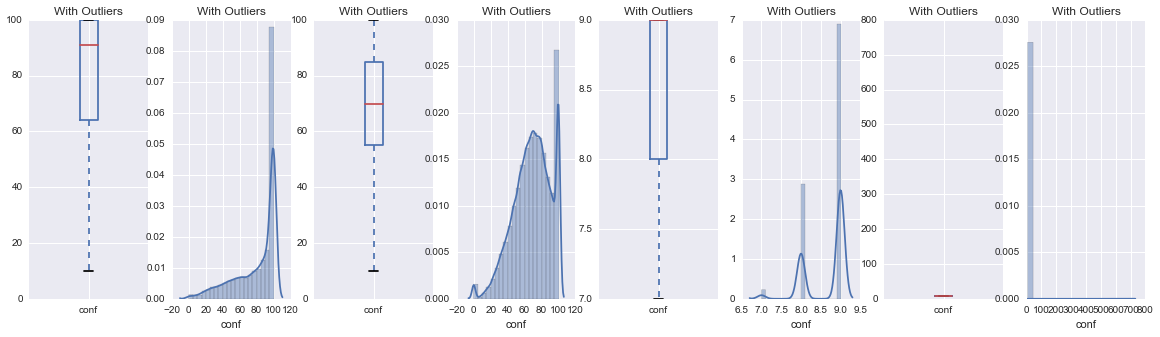

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


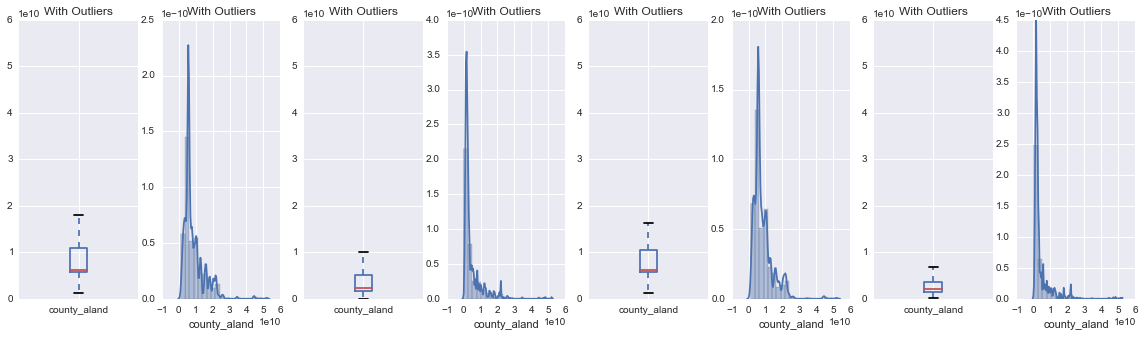

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


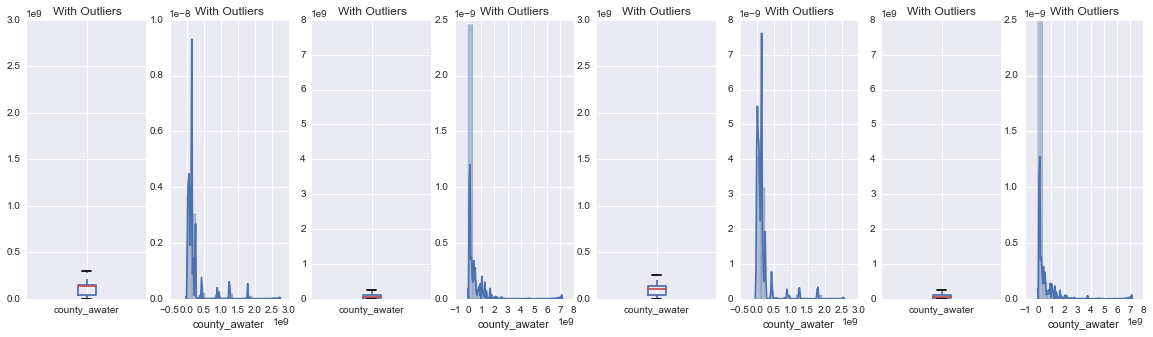

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


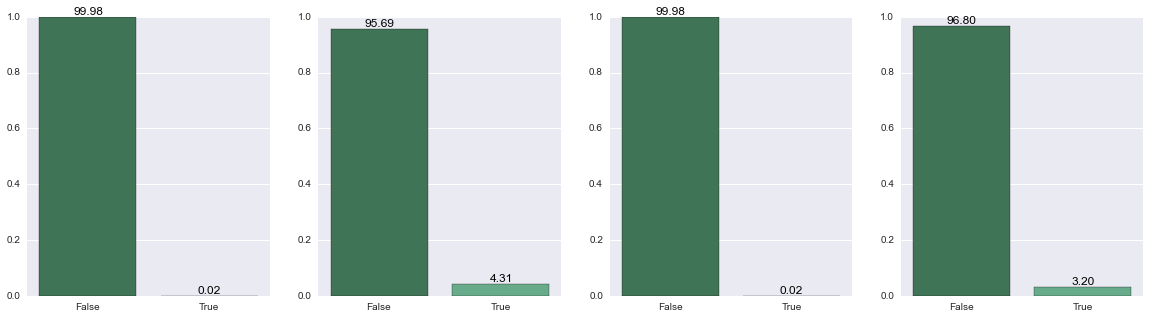

Variable: src : Fires, then non-fires... Modis, then VIIRS


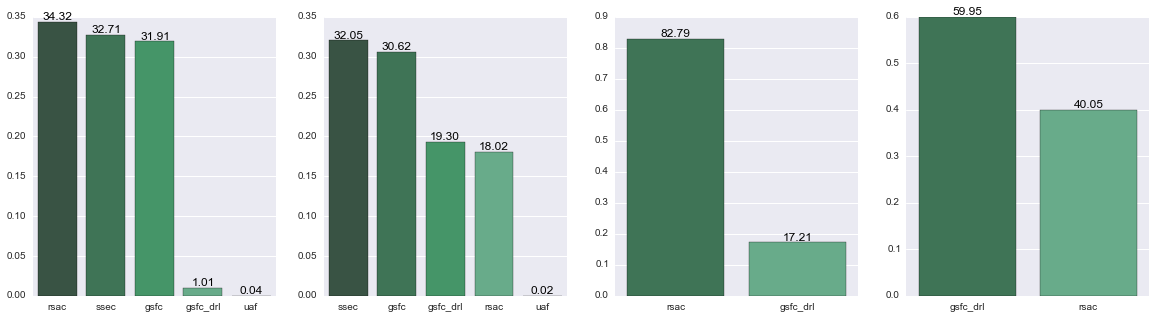

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


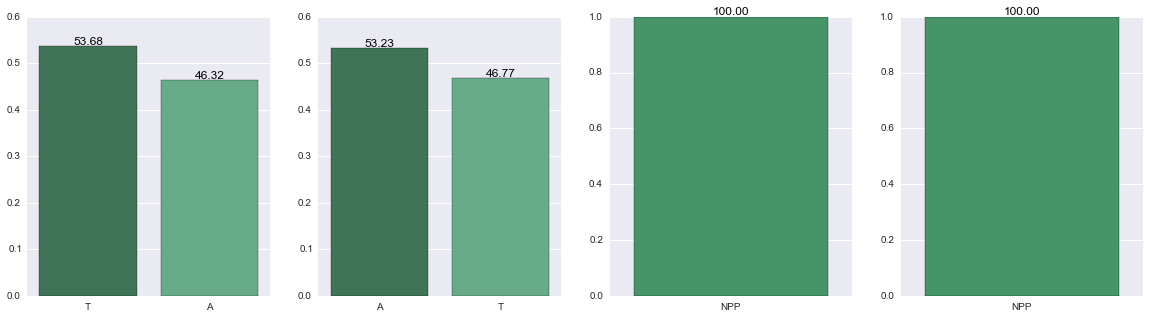

In [4]:
plot_modis_viirs(2013)

Year: 2014
--------------------------------------------------
Modis - Num. obs: 224904, Num. fires: 23932, Pct. fires: 0.106409845979
Viirs - Num. obs: 103035, Num. fires: 6083, Pct. fires: 0.059038190906
Variable: lat : Fires, then non-fires... Modis, then VIIRS


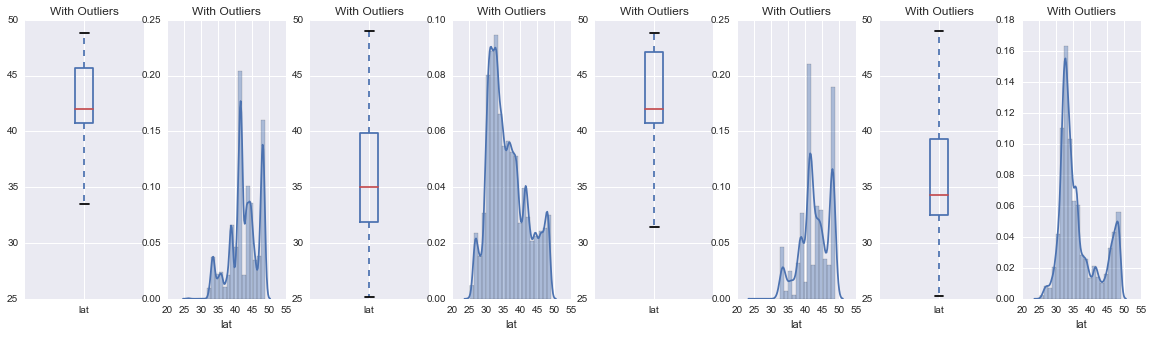

Variable: long : Fires, then non-fires... Modis, then VIIRS


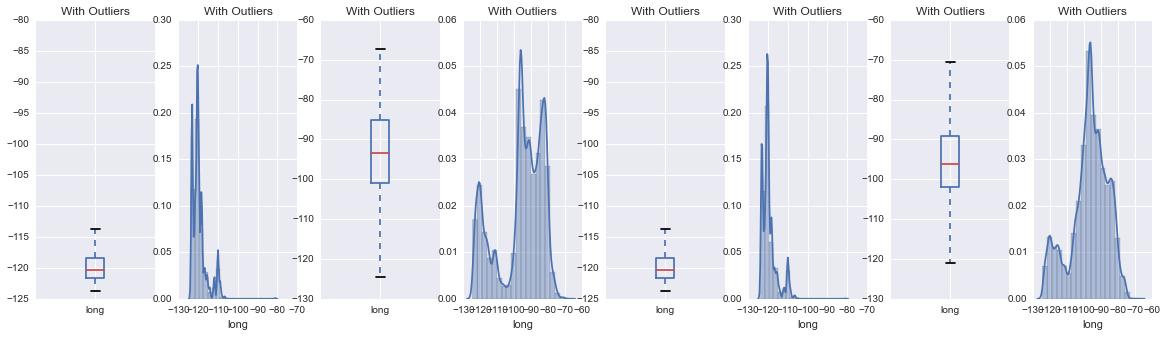

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


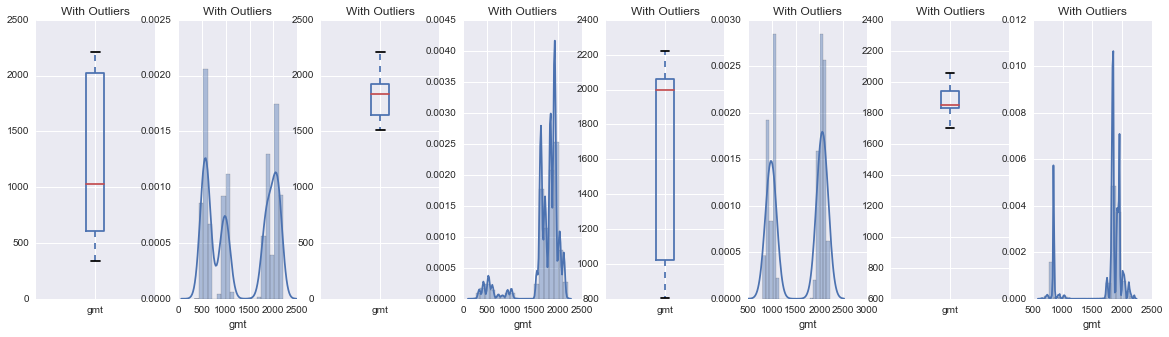

Variable: conf : Fires, then non-fires... Modis, then VIIRS


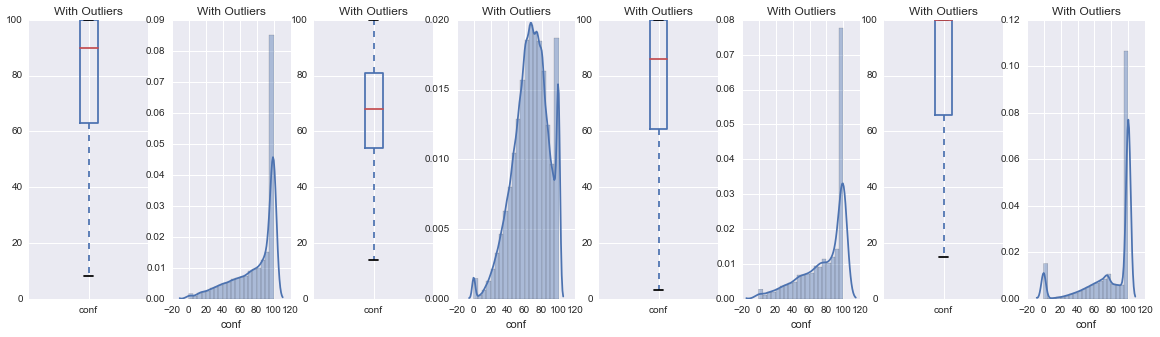

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


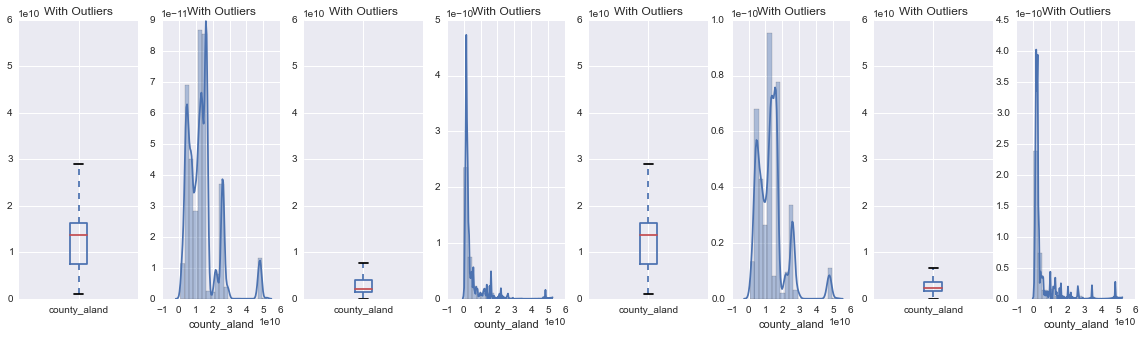

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


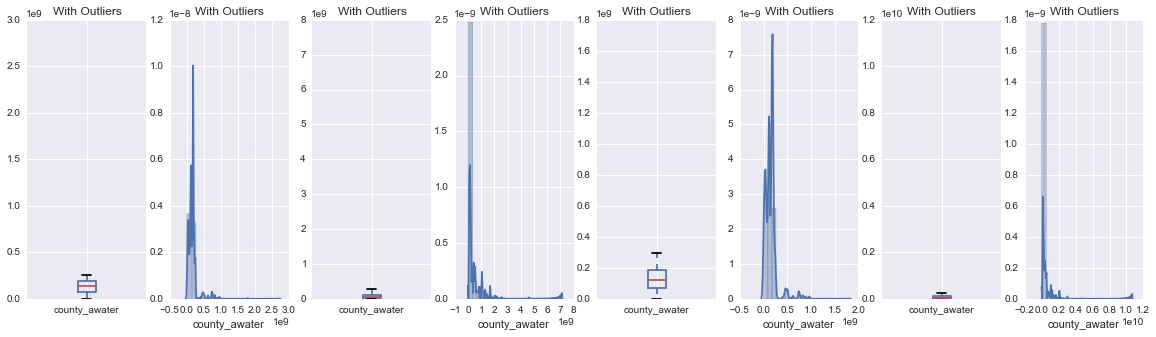

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


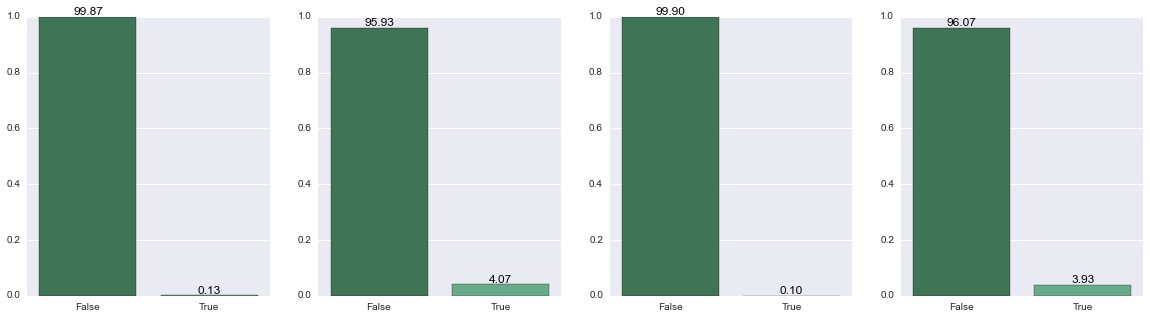

Variable: src : Fires, then non-fires... Modis, then VIIRS


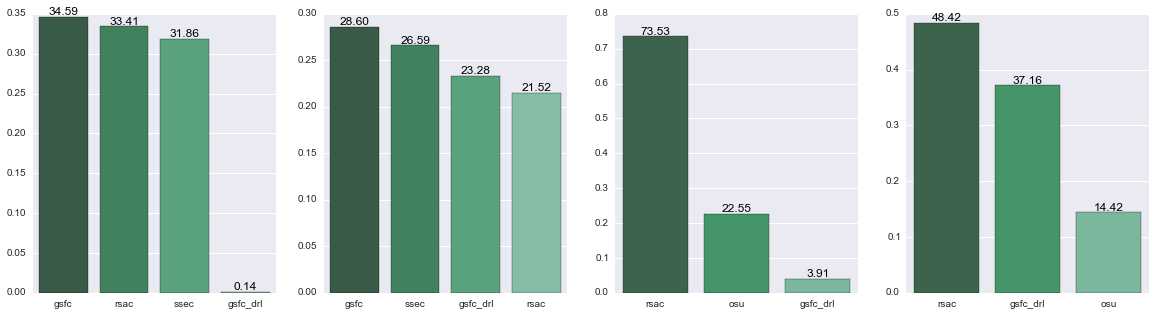

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


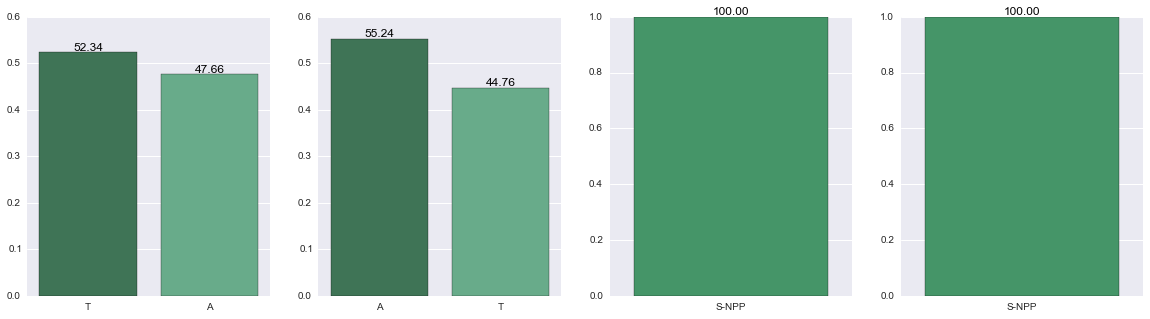

In [5]:
plot_modis_viirs(2014)

Year: 2015
--------------------------------------------------
Modis - Num. obs: 145010, Num. fires: 32873, Pct. fires: 0.22669471071
Viirs - Num. obs: 76159, Num. fires: 11345, Pct. fires: 0.148964666028
Variable: lat : Fires, then non-fires... Modis, then VIIRS


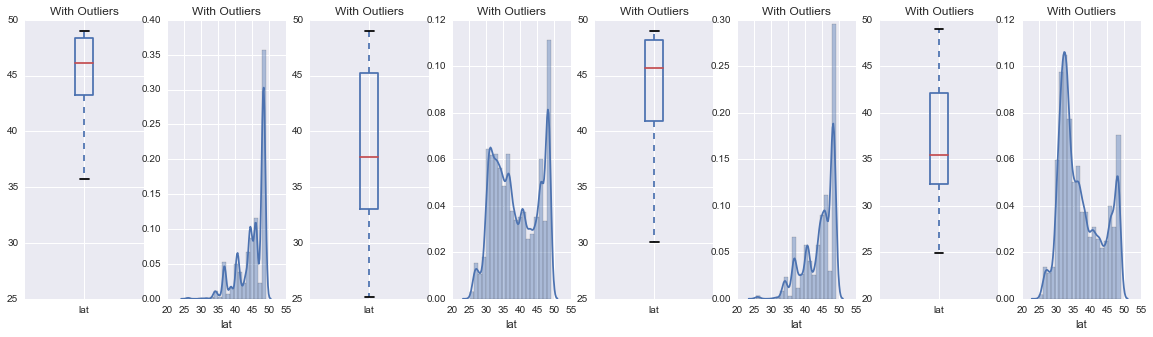

Variable: long : Fires, then non-fires... Modis, then VIIRS


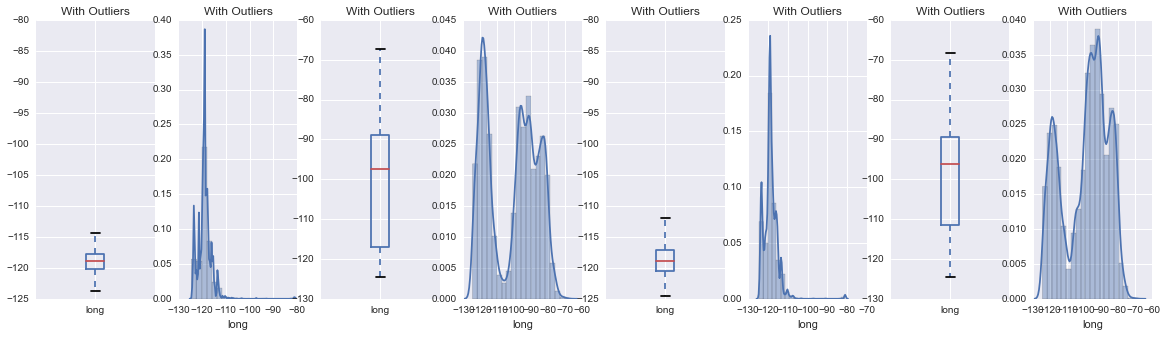

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


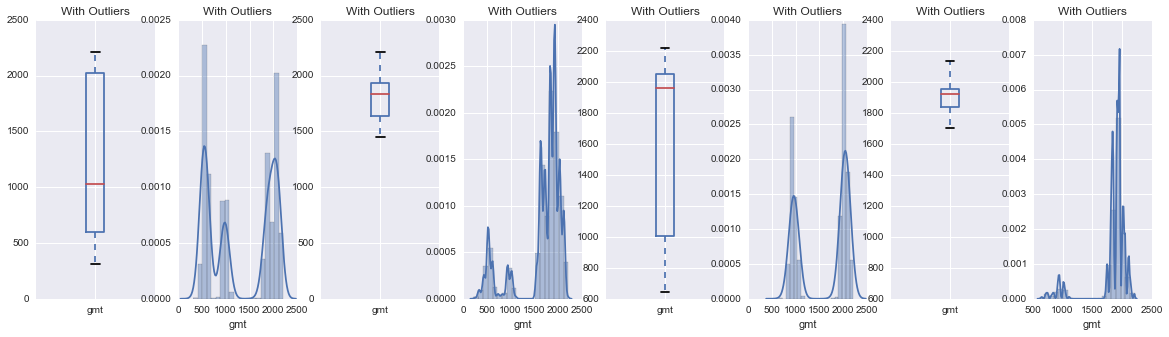

Variable: conf : Fires, then non-fires... Modis, then VIIRS


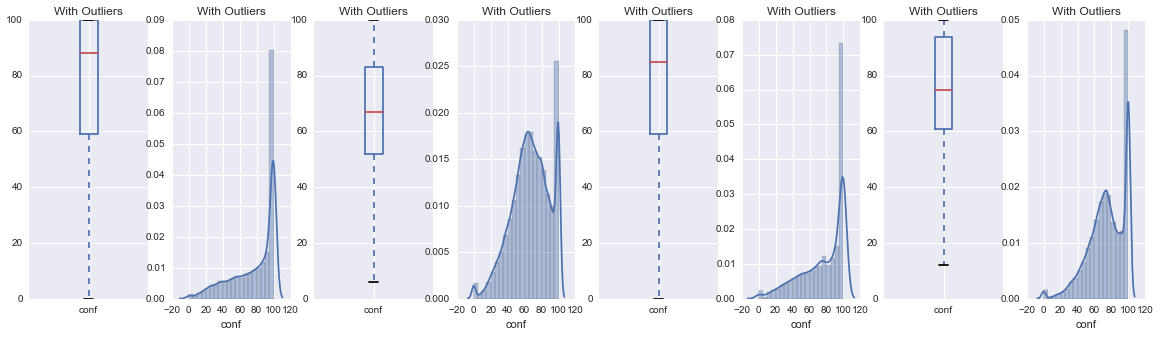

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


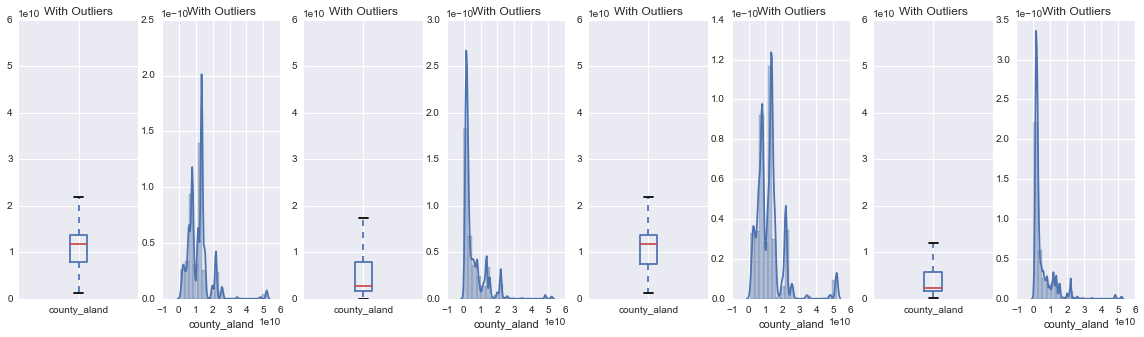

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


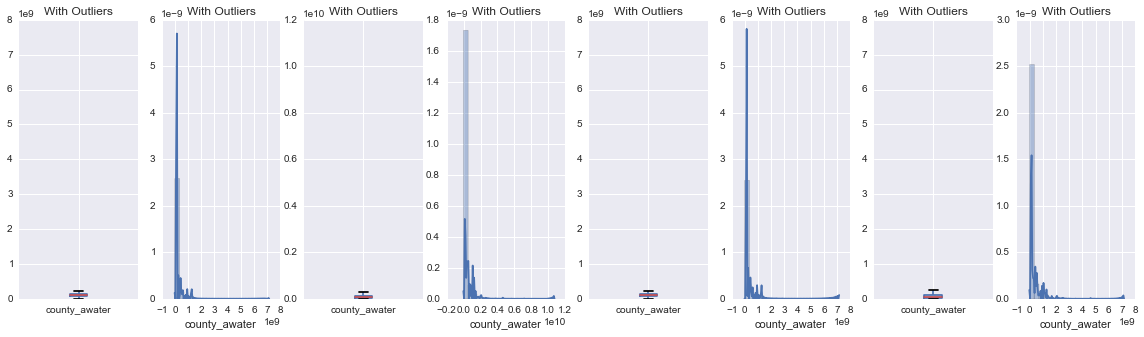

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


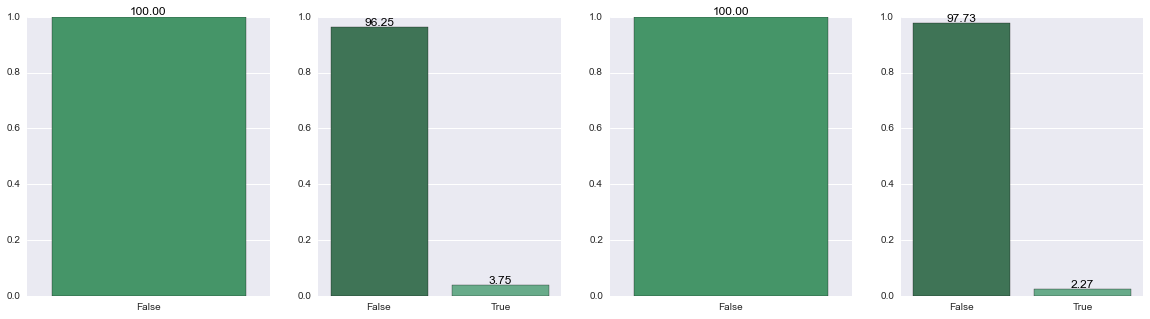

Variable: src : Fires, then non-fires... Modis, then VIIRS


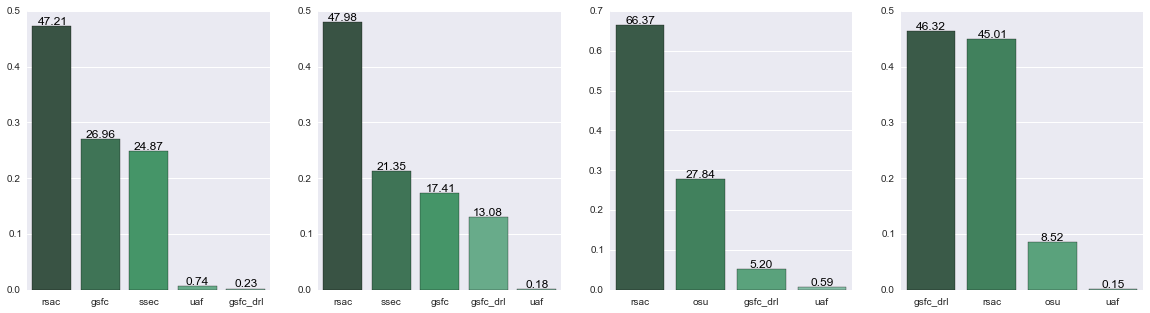

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


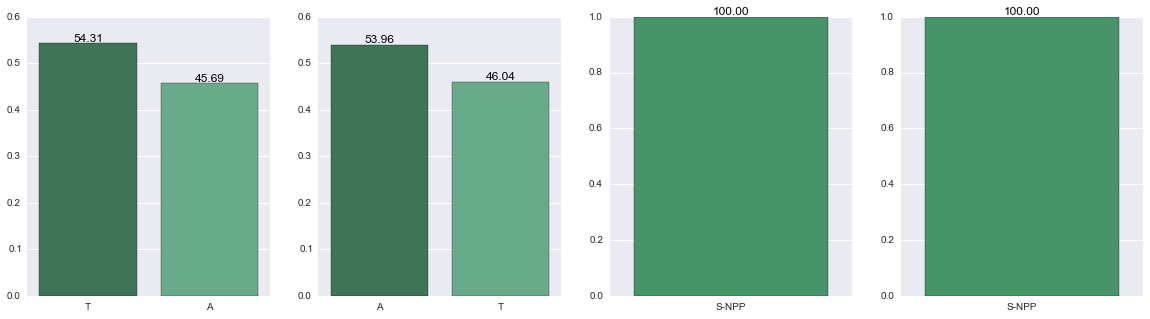

In [6]:
plot_modis_viirs(2015)

In [7]:
def grab_by_location(df, state_names, county_names=None): 
    """Grab the data for a specified inputted state and county. 
    
    Args: 
        df: Pandas DataFrame
        state: set (or iterable of strings)
            State to grab for plotting.
        county: set (or iterable of strings) (optional)
            County names to grab for plotting. If None, simply grab the 
            entire state to plot. 
            
    Return: 
        Pandas DataFrame
    """
    if county_names: 
        output_df = df.query('state_name in @state_names and county_name in @county_names')
    else: 
        output_df = df.query('state_name in @state_names')
    return output_df

def grab_by_date(df, months=None, dt=None): 
    """Grab the data for a set of specified months.
    
    Args: 
        df: Pandas DataFrame
        months: set (or iterable of strings)
    
    Return: 
        Pandas DataFrame
    """
    if months is not None: 
        output_df = df.query("month in @months")
    else: 
        split_dt = dt.split('-')
        year, month, dt = int(split_dt[0]), int(split_dt[1]), int(split_dt[2])
        match_dt = datetime.datetime(year, month, dt, 0, 0, 0)
        output_df = df.query('date == @match_dt')
    return output_df

def format_df(df): 
    """Format the data to plot it on maps. 
    
    This function will grab the latitude and longitude 
    columns of the DataFrame, and return those, along 
    with a third column that will be newly generated. This 
    new column will hold what color we want to use to plot 
    the lat/long coordinate - I'll use red for fire and 
    green for non-fire. 
    
    Args: 
        df: Pandas DataFrame
    
    Return: 
        numpy.ndarray
    """
    
    keep_cols = ['long', 'lat', 'fire_bool']
    intermediate_df = df[keep_cols]
    output_df = parse_fire_bool(intermediate_df)
    output_array = output_df.values
    return output_array

def parse_fire_bool(df): 
    """Parse the fire boolean to a color for plotting. 
    
    Args: 
        df: Pandas DataFrame
        
    Return: 
        Pandas DataFrame
    """
    
    # Plot actual fires red and non-fires green. 
    output_df = df.drop('fire_bool', axis=1)
    output_df['plotting_mark'] = df['fire_bool'].apply(lambda f_bool: 'ro' if f_bool == True else 'go')
    return output_df

def read_n_parse(fires_df, state_names, county_names=None, months=None, plotting=False, dt=None): 
    """Read and parse the data for plotting.
    
    Args: 
        fires_df: Pandas DataFrame
            Inputted data that contains all of our obs. 
        state_names: set (or other iterable) of state names
            State names to grab for plotting. 
        county_names: set (or other iterable) of county names (optional)
            County names to grab for plotting. 
        months: months (or other iterable) of months (optional)
            Month names to grab for plotting. 
        plotting: bool 
            Whether or not to format the data for plotting. 
            
    Return: 
        Pandas DataFrame
    """
    
    if state_names: 
        fires_df = grab_by_location(fires_df, state_names, county_names)
    
    if months or dt: 
        fires_df = grab_by_date(fires_df, months, dt)
    
    if plotting: 
        fires_df = format_df(fires_df)
    return fires_df

def grab_trues_falses(fires_df): 
    """Separate and return the trues/falses for the fires columns. 
    
    Args: 
        fires_df: Pandas DataFrame
        
    Return: Pandas DataFrame, Pandas DataFrame
    """
    
    fires = fires_df[fires_df[:,2] == 'ro']
    non_fires = fires_df[fires_df[:,2] == 'go']
    
    return fires, non_fires

def plot_states(year, state_names, months=None, plotting=True): 
    """Plot a state map and the given fires data points for that state. 
    
    Plot for both the MODIS and VIIRS data so that we can compare across
    the two data sets. 
    
    Args: 
        year: str
        state_names: set (or other iterable) of state names
            State names to grab for plotting. 
        months: set (or other iterable) of month names 
            Month names to grab for plotting. 
        plotting: bool 
            Whether or not to format the data for plotting. 
    
    Return: Plotted Basemap
    """
    
    modis_df = read_df(year)
    viirs_df = read_df(year, modis=False)
    modis_fires = read_n_parse(modis_df, state_names, months=months, plotting=plotting)
    viirs_fires = read_n_parse(viirs_df, state_names, months=months, plotting=plotting)
    
    modis_trues, modis_falses = grab_trues_falses(modis_fires)
    viirs_trues, viirs_falses = grab_trues_falses(viirs_fires)
    
    ax = plt.subplot(1, 4, 1)
    state_map = USMapBuilder('data/state_shapefiles_2014/cb_2014_us_state_500k2.shp', geo_level='State', 
                        state_names=state_names, ax=ax, border_padding=1)
    state_map.plot_points(modis_trues)
    ax = plt.subplot(1, 4, 2)
    state_map = USMapBuilder('data/state_shapefiles_2014/cb_2014_us_state_500k2.shp', geo_level='State',  
                        state_names=state_names, ax=ax, border_padding=1)
    state_map.plot_points(modis_falses)
    ax = plt.subplot(1, 4, 3)
    state_map = USMapBuilder('data/state_shapefiles_2014/cb_2014_us_state_500k2.shp', geo_level='State', 
                        state_names=state_names, ax=ax, border_padding=1)
    state_map.plot_points(viirs_trues)
    ax = plt.subplot(1, 4, 4)
    state_map = USMapBuilder('data/state_shapefiles_2014/cb_2014_us_state_500k2.shp', geo_level='State',  
                        state_names=state_names, ax=ax, border_padding=1)
    state_map.plot_points(viirs_falses)
    plt.show()

In [8]:
years = ['2012', '2013', '2014', '2015']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
         'November', 'December']

Year: 2012, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


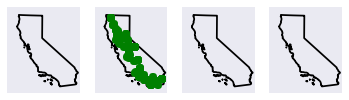

Year: 2013, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


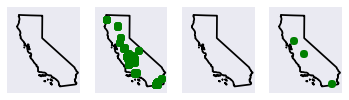

Year: 2014, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


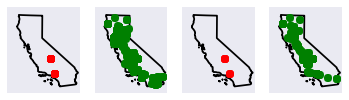

Year: 2015, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


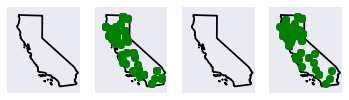

Year: 2012, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


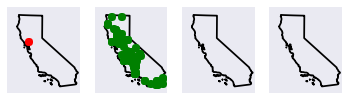

Year: 2013, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


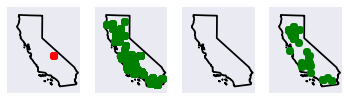

Year: 2014, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


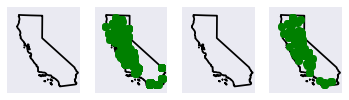

Year: 2015, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


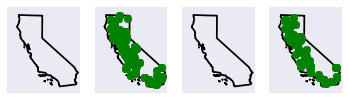

Year: 2012, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


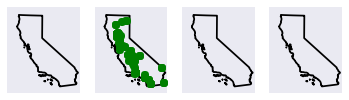

Year: 2013, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


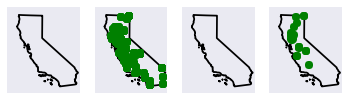

Year: 2014, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


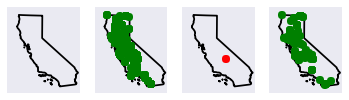

Year: 2015, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


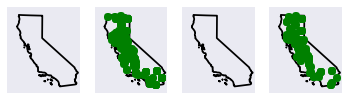

Year: 2012, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


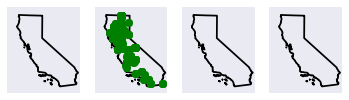

Year: 2013, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


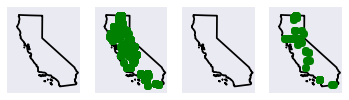

Year: 2014, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


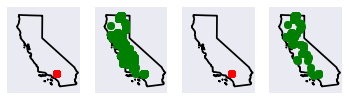

Year: 2015, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


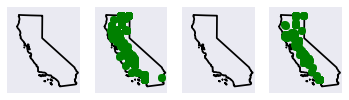

Year: 2012, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


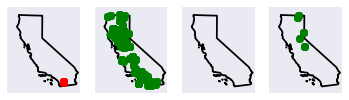

Year: 2013, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


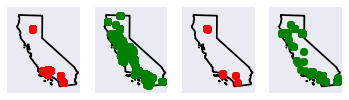

Year: 2014, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


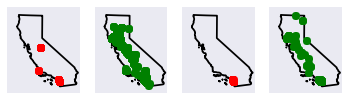

Year: 2015, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


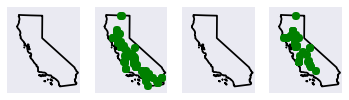

Year: 2012, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


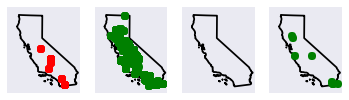

Year: 2013, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


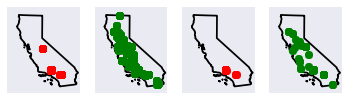

Year: 2014, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


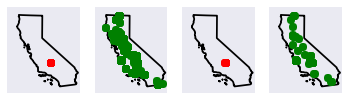

Year: 2015, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


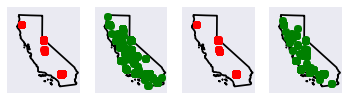

Year: 2012, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


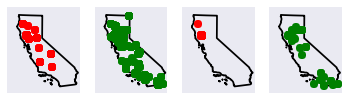

Year: 2013, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


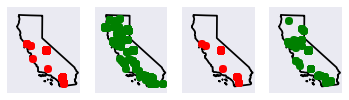

Year: 2014, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


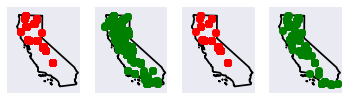

Year: 2015, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


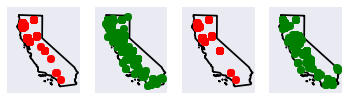

Year: 2012, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


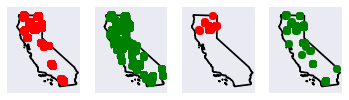

Year: 2013, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


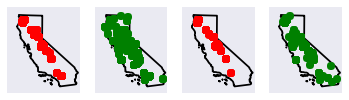

Year: 2014, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


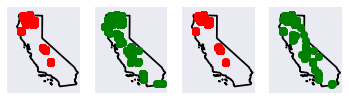

Year: 2015, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


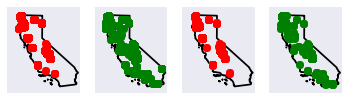

Year: 2012, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


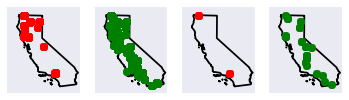

Year: 2013, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


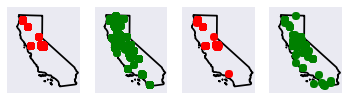

Year: 2014, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


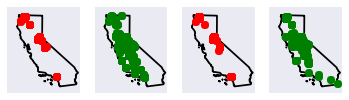

Year: 2015, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


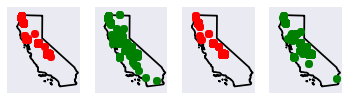

Year: 2012, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


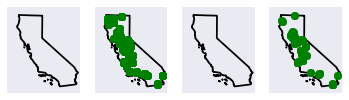

Year: 2013, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


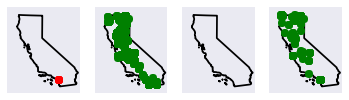

Year: 2014, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


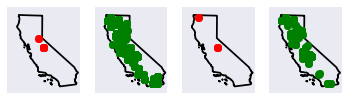

Year: 2015, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


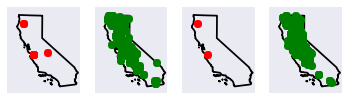

Year: 2012, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


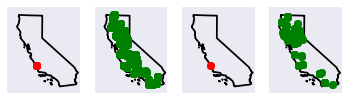

Year: 2013, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


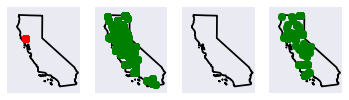

Year: 2014, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


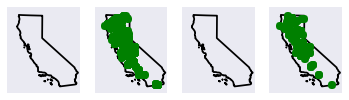

Year: 2015, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


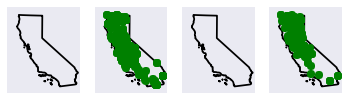

Year: 2012, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


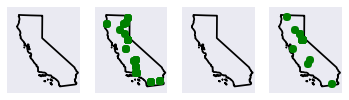

Year: 2013, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


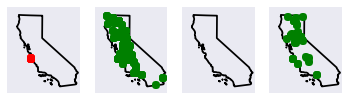

Year: 2014, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


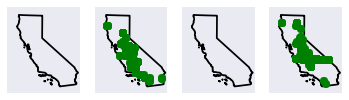

Year: 2015, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


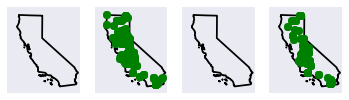

In [9]:
state_names = ['California']
for month in months: 
    for year in years: 
        print 'Year: {}, Month: {}'.format(year, month)
        print 'Modis fires, non-fires.... VIIRS fires, non-fires'
        plot_states(year, state_names, months=[month])

Year: 2012, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


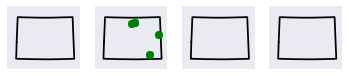

Year: 2013, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


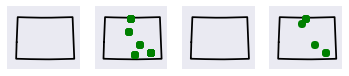

Year: 2014, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


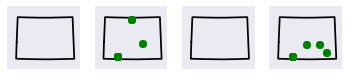

Year: 2015, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


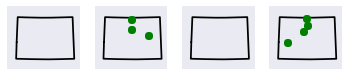

Year: 2012, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


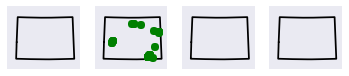

Year: 2013, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


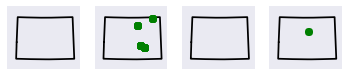

Year: 2014, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


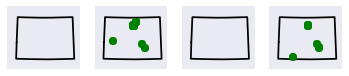

Year: 2015, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


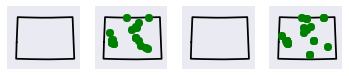

Year: 2012, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


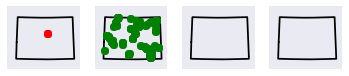

Year: 2013, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


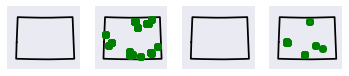

Year: 2014, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


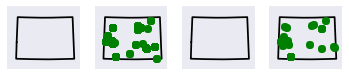

Year: 2015, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


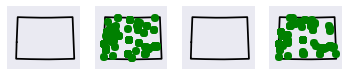

Year: 2012, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


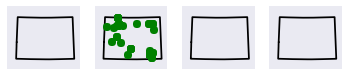

Year: 2013, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


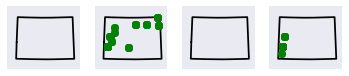

Year: 2014, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


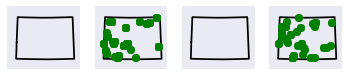

Year: 2015, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


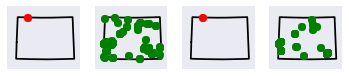

Year: 2012, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


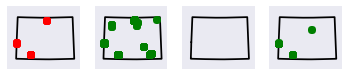

Year: 2013, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


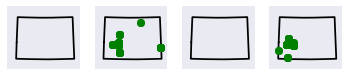

Year: 2014, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


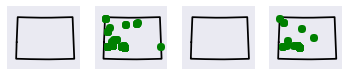

Year: 2015, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


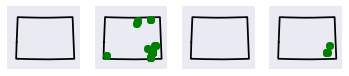

Year: 2012, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


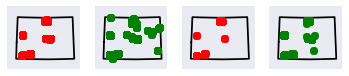

Year: 2013, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


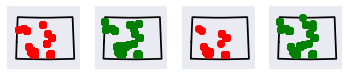

Year: 2014, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


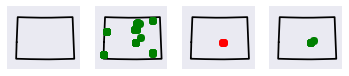

Year: 2015, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


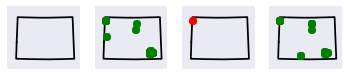

Year: 2012, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


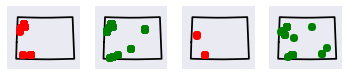

Year: 2013, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


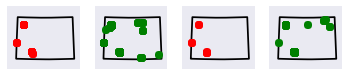

Year: 2014, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


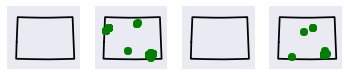

Year: 2015, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


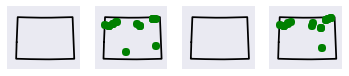

Year: 2012, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


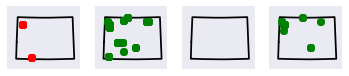

Year: 2013, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


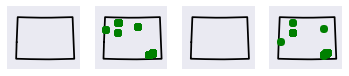

Year: 2014, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


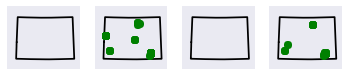

Year: 2015, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


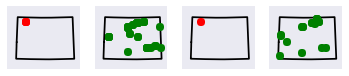

Year: 2012, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


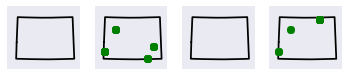

Year: 2013, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


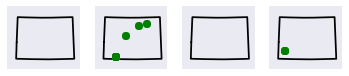

Year: 2014, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


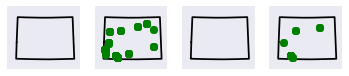

Year: 2015, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


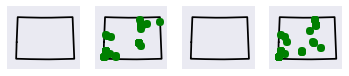

Year: 2012, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


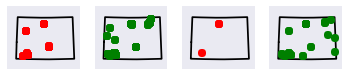

Year: 2013, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


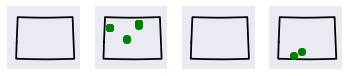

Year: 2014, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


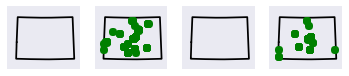

Year: 2015, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


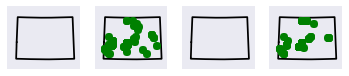

Year: 2012, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


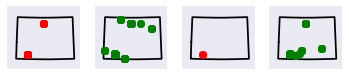

Year: 2013, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


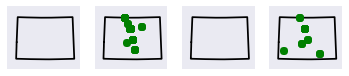

Year: 2014, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


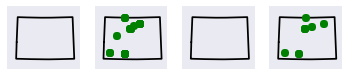

Year: 2015, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


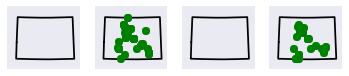

Year: 2012, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


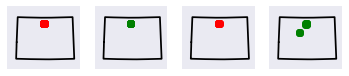

Year: 2013, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


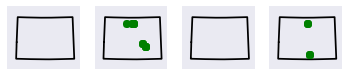

Year: 2014, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


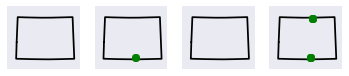

Year: 2015, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


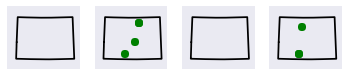

In [10]:
state_names = ['Colorado']
for month in months: 
    for year in years: 
        print 'Year: {}, Month: {}'.format(year, month)
        print 'Modis fires, non-fires.... VIIRS fires, non-fires'
        plot_states(year, state_names, months=[month])

Year: 2012, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


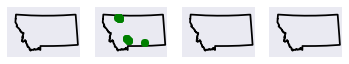

Year: 2013, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


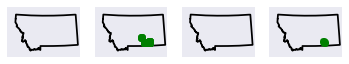

Year: 2014, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


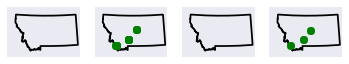

Year: 2015, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


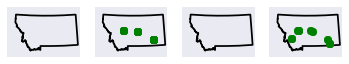

Year: 2012, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


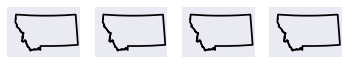

Year: 2013, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


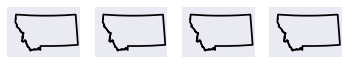

Year: 2014, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


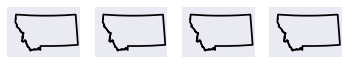

Year: 2015, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


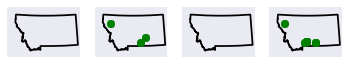

Year: 2012, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


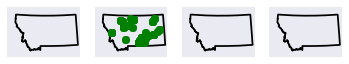

Year: 2013, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


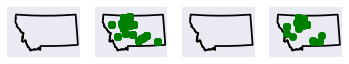

Year: 2014, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


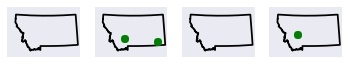

Year: 2015, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


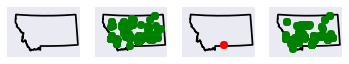

Year: 2012, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


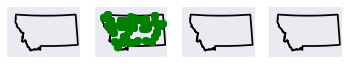

Year: 2013, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


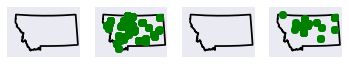

Year: 2014, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


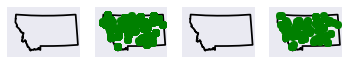

Year: 2015, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


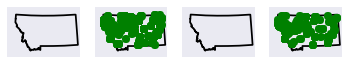

Year: 2012, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


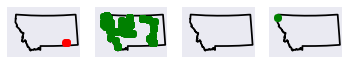

Year: 2013, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


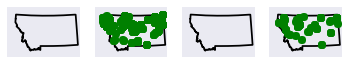

Year: 2014, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


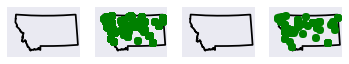

Year: 2015, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


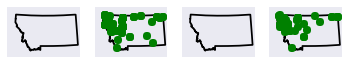

Year: 2012, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


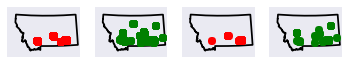

Year: 2013, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


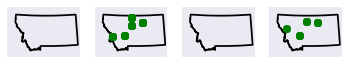

Year: 2014, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


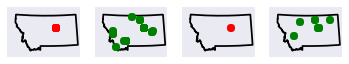

Year: 2015, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


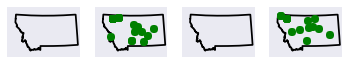

Year: 2012, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


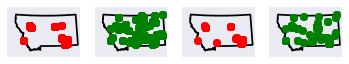

Year: 2013, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


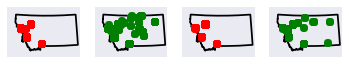

Year: 2014, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


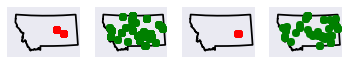

Year: 2015, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


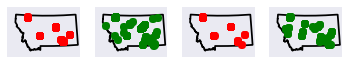

Year: 2012, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


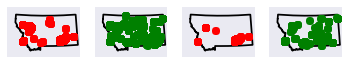

Year: 2013, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


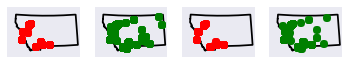

Year: 2014, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


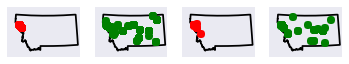

Year: 2015, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


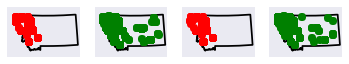

Year: 2012, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


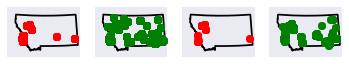

Year: 2013, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


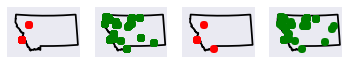

Year: 2014, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


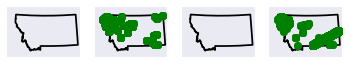

Year: 2015, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


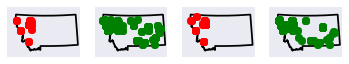

Year: 2012, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


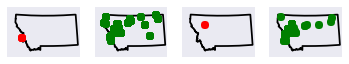

Year: 2013, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


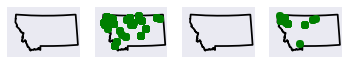

Year: 2014, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


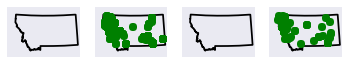

Year: 2015, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


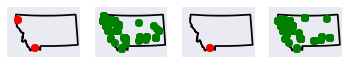

Year: 2012, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


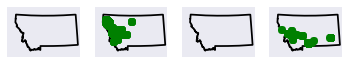

Year: 2013, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


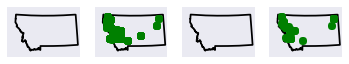

Year: 2014, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


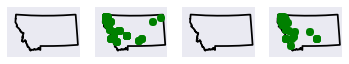

Year: 2015, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


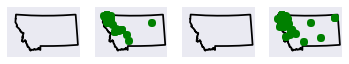

Year: 2012, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


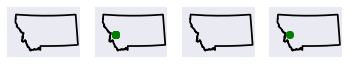

Year: 2013, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


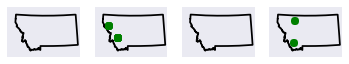

Year: 2014, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


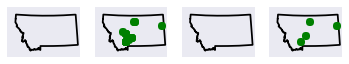

Year: 2015, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


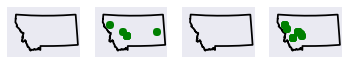

In [11]:
state_names = ['Montana']
for month in months: 
    for year in years: 
        print 'Year: {}, Month: {}'.format(year, month)
        print 'Modis fires, non-fires.... VIIRS fires, non-fires'
        plot_states(year, state_names, months=[month])

Year: 2012, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


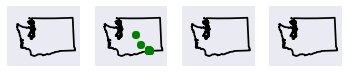

Year: 2013, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


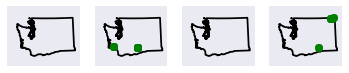

Year: 2014, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


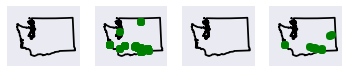

Year: 2015, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


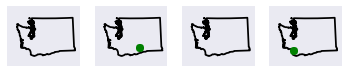

Year: 2012, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


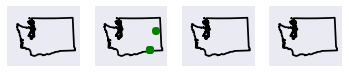

Year: 2013, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


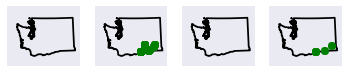

Year: 2014, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


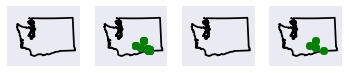

Year: 2015, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


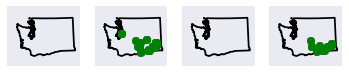

Year: 2012, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


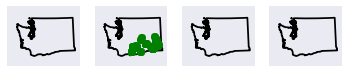

Year: 2013, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


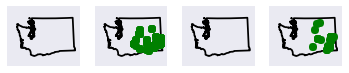

Year: 2014, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


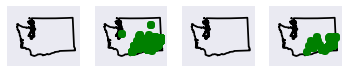

Year: 2015, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


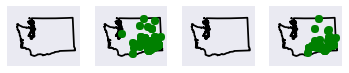

Year: 2012, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


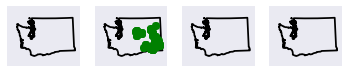

Year: 2013, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


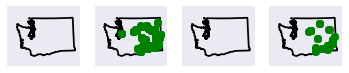

Year: 2014, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


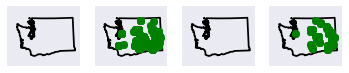

Year: 2015, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


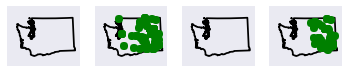

Year: 2012, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


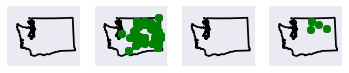

Year: 2013, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


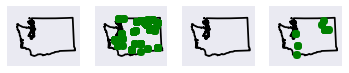

Year: 2014, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


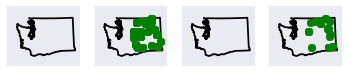

Year: 2015, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


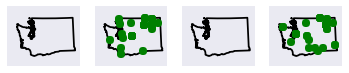

Year: 2012, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


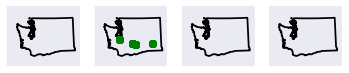

Year: 2013, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


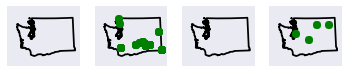

Year: 2014, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


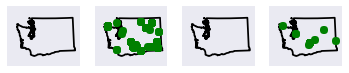

Year: 2015, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


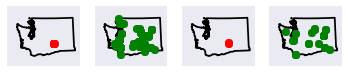

Year: 2012, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


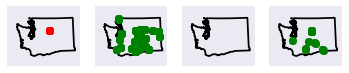

Year: 2013, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


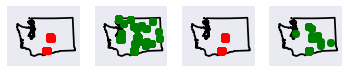

Year: 2014, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


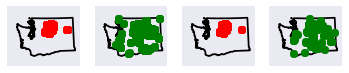

Year: 2015, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


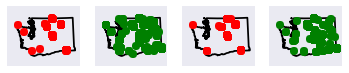

Year: 2012, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


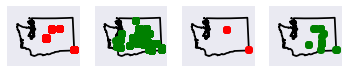

Year: 2013, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


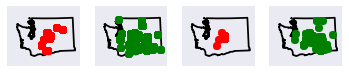

Year: 2014, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


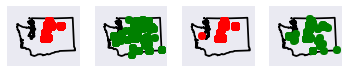

Year: 2015, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


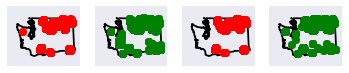

Year: 2012, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


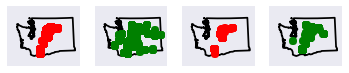

Year: 2013, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


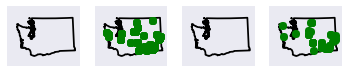

Year: 2014, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


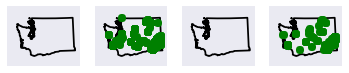

Year: 2015, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


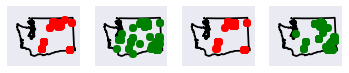

Year: 2012, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


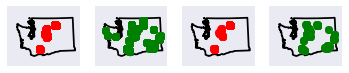

Year: 2013, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


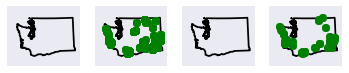

Year: 2014, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


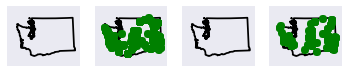

Year: 2015, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


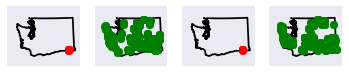

Year: 2012, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


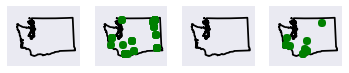

Year: 2013, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


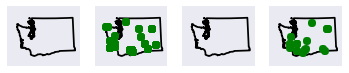

Year: 2014, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


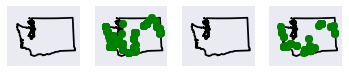

Year: 2015, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


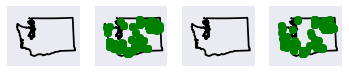

Year: 2012, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


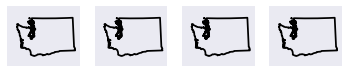

Year: 2013, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


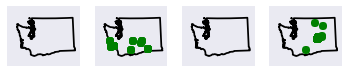

Year: 2014, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


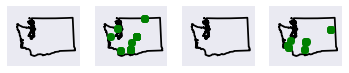

Year: 2015, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


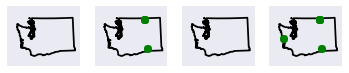

In [12]:
state_names = ['Washington']
for month in months: 
    for year in years: 
        print 'Year: {}, Month: {}'.format(year, month)
        print 'Modis fires, non-fires.... VIIRS fires, non-fires'
        plot_states(year, state_names, months=[month])

Year: 2012, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


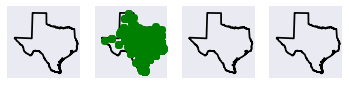

Year: 2013, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


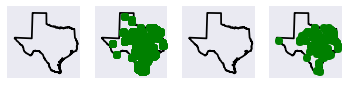

Year: 2014, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


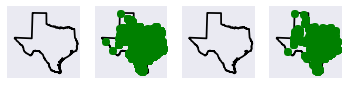

Year: 2015, Month: January
Modis fires, non-fires.... VIIRS fires, non-fires


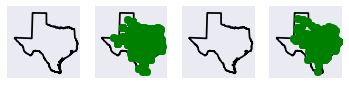

Year: 2012, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


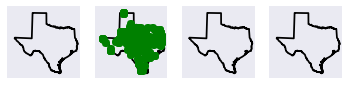

Year: 2013, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


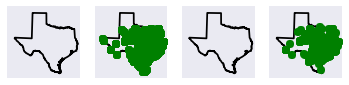

Year: 2014, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


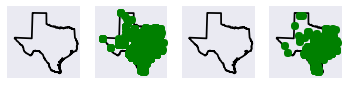

Year: 2015, Month: February
Modis fires, non-fires.... VIIRS fires, non-fires


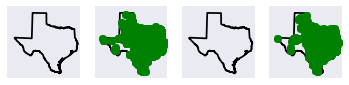

Year: 2012, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


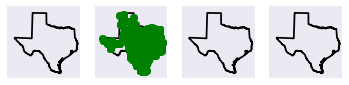

Year: 2013, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


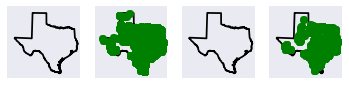

Year: 2014, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


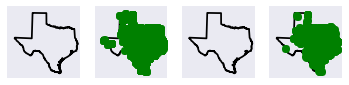

Year: 2015, Month: March
Modis fires, non-fires.... VIIRS fires, non-fires


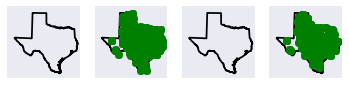

Year: 2012, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


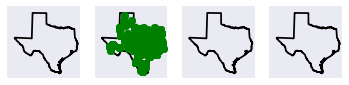

Year: 2013, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


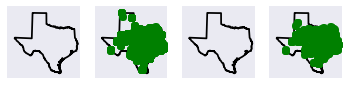

Year: 2014, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


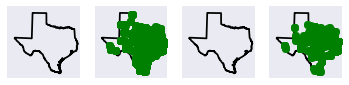

Year: 2015, Month: April
Modis fires, non-fires.... VIIRS fires, non-fires


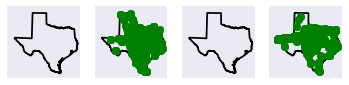

Year: 2012, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


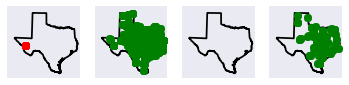

Year: 2013, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


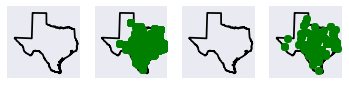

Year: 2014, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


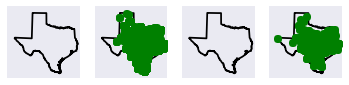

Year: 2015, Month: May
Modis fires, non-fires.... VIIRS fires, non-fires


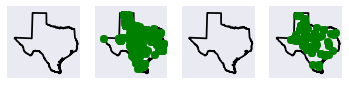

Year: 2012, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


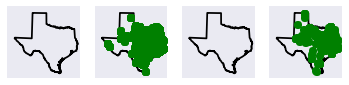

Year: 2013, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


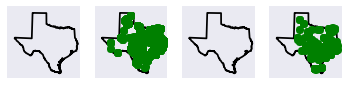

Year: 2014, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


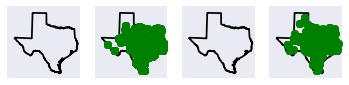

Year: 2015, Month: June
Modis fires, non-fires.... VIIRS fires, non-fires


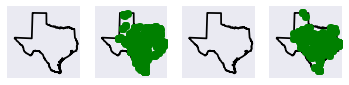

Year: 2012, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


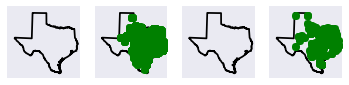

Year: 2013, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


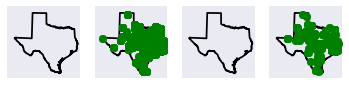

Year: 2014, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


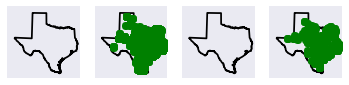

Year: 2015, Month: July
Modis fires, non-fires.... VIIRS fires, non-fires


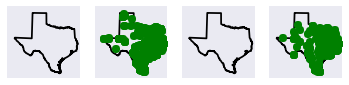

Year: 2012, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


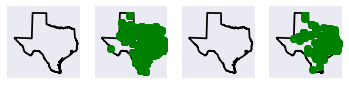

Year: 2013, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


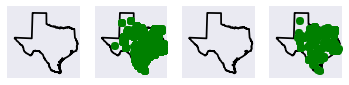

Year: 2014, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


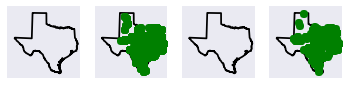

Year: 2015, Month: August
Modis fires, non-fires.... VIIRS fires, non-fires


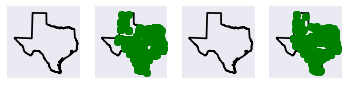

Year: 2012, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


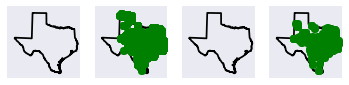

Year: 2013, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


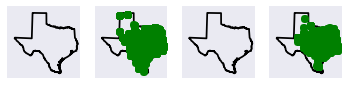

Year: 2014, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


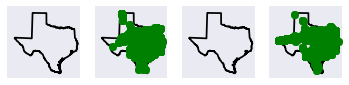

Year: 2015, Month: September
Modis fires, non-fires.... VIIRS fires, non-fires


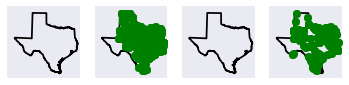

Year: 2012, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


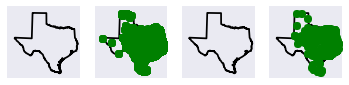

Year: 2013, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


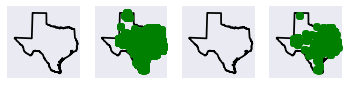

Year: 2014, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


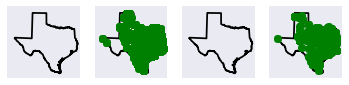

Year: 2015, Month: October
Modis fires, non-fires.... VIIRS fires, non-fires


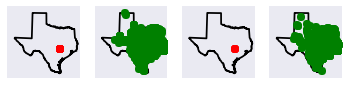

Year: 2012, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


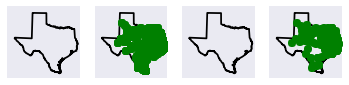

Year: 2013, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


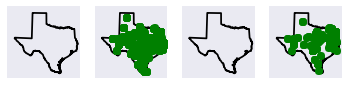

Year: 2014, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


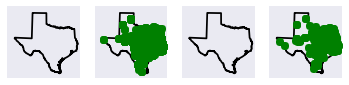

Year: 2015, Month: November
Modis fires, non-fires.... VIIRS fires, non-fires


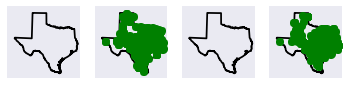

Year: 2012, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


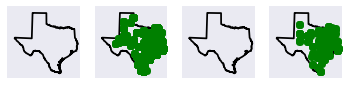

Year: 2013, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


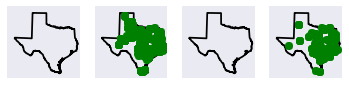

Year: 2014, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


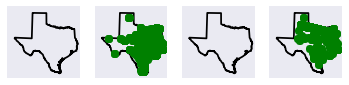

Year: 2015, Month: December
Modis fires, non-fires.... VIIRS fires, non-fires


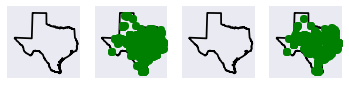

In [13]:
state_names = ['Texas']
for month in months: 
    for year in years: 
        print 'Year: {}, Month: {}'.format(year, month)
        print 'Modis fires, non-fires.... VIIRS fires, non-fires'
        plot_states(year, state_names, months=[month])

Given that the MODIS data contains more years of data (back to 2001 versus 2012 for VIIRS), more observations per year, and more fires per year, the burden of proof here I think falls on showing if/why I should not use MODIS (or why VIIRS is better). 

When compared to MODIS, we can see that it doesn't contain two of the variables that appear might be predicive - time and fire radiative power. The distributions of the data above appear pretty similar across all variables. Outside of the conf. variable in 2012 and 2013 (where VIIRS almost looks like this variable was collected differently and/or incorrectly), nothing stands out as suggesting that I shouldn't use MODIS. If we look at the geographical plotting of observations, we can clearly see the manifestation of the MODIS data having not only more observations, but more fires as well. There are cases where MODIS has identified fires that VIIRS hasn't (or at least via the labeling mechanism I am using), and vice versa. The majority of the time, it's MODIS identifying fires that VIIRS hasn't. This still points to using MODIS over VIIRS. Given all of this, I'm going to stick with MODIS. 

Of course, there is the possibility of combining the datasets in some way. I'm leaving that as an option to come back to if I think it will help. 